### 1400772 Abdelrhman Magdy

## Harris Algorithms
Harris algorithm is an edge detection algorithm for images.

#### Importing necessary modules

In [29]:
from skimage.io import imread,imshow
from skimage.color import rgb2gray,gray2rgb
from scipy import signal as sig
import numpy as np
import cv2

#### Process the input image

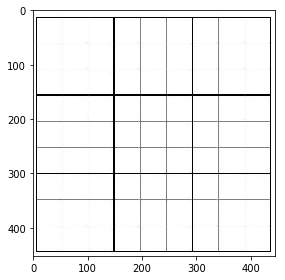

In [25]:
img = imread('sudoku.jpg',as_gray = False)
imgrgb = gray2rgb(img)
imggray = rgb2gray(img)
imshow(imggray)

### Deravative calculation
By convolve the image with sobel kernel.

In [26]:

## Using Sobel kernels.
kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
I_x = sig.convolve2d(imggray, kernel_x, mode='same')

kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
I_y = sig.convolve2d(imggray, kernel_y, mode='same')

Ixx = I_x**2
Ixy = I_y*I_x
Iyy = I_y**2

### Calculating R Values for each pixel

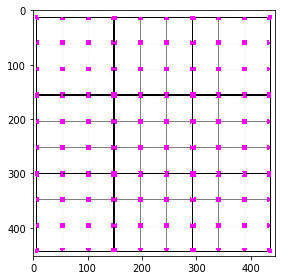

In [27]:
offset = 3
width = img.shape[1]
height = img.shape[0]
output = img.copy()
# Looping over all pixels of the image to find Sxx,Syy,Sxy
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        # Calculating Determinant, Trace and hence the value of R ..
        k = 0.04
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - k*(trace**2)
        #print r
        if r > 100:
            output[y,x] = [255,0,255]
imshow(output)

### OpenCV
Obtaining the same algorithm using openCV.

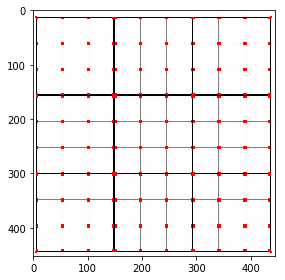

In [37]:
img = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst= cv2.cornerHarris(gray,2,3,0.04)
dst= cv2.dilate(dst,None)
img[dst > 0.01*dst.max()]= [0,0,255]

result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(result)